In [1]:
pip install matplotlib numpy seaborn scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 66.9 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 158.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 157.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 156.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


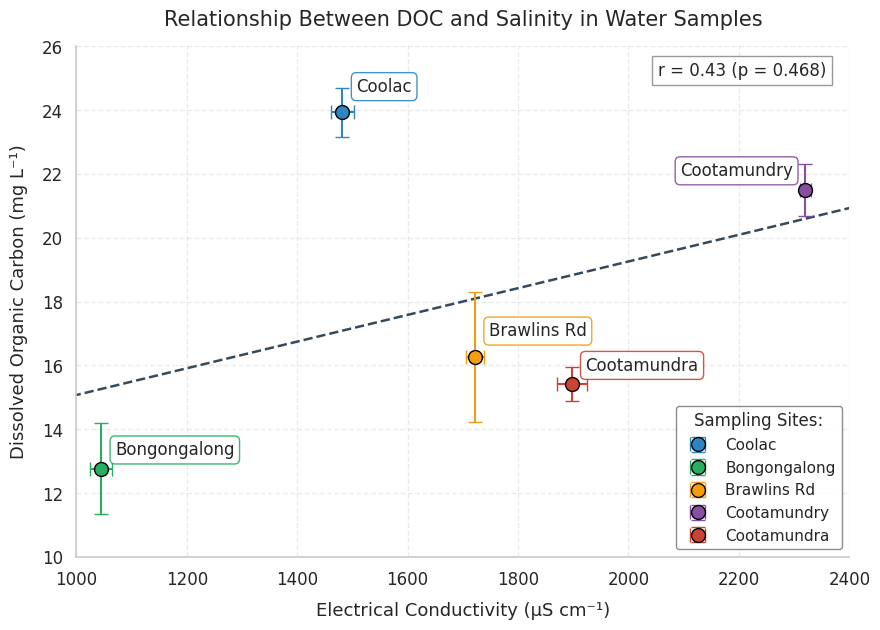

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

# Data
sites = ['Coolac', 'Bongongalong', 'Brawlins Rd', 'Cootamundry', 'Cootamundra']
doc_means = [23.93, 12.76, 16.27, 21.51, 15.41]  # mg L⁻¹
doc_se = [0.76, 1.43, 2.03, 0.82, 0.53]
ec_means = [1482, 1045, 1722, 2320, 1897]        # µS cm⁻¹
ec_se = [21, 20, 16, 10, 27]

# Set style to match attached example
sns.set_context("notebook", font_scale=1.1)
sns.set_style("whitegrid", {'grid.linestyle': '--', 'grid.alpha': 0.4})
plt.rc('font', family='sans serif')

fig, ax = plt.subplots(figsize=(9, 6.5))

# Color palette matching typical scientific plots
palette = ['#2E86C1', '#27AE60', '#F39C12', '#884EA0', '#CB4335']

# Custom annotation positions to prevent overlap
annot_positions = {
    'Coolac': (10, 15),
    'Bongongalong': (10, 10),
    'Brawlins Rd': (10, 15),
    'Cootamundry': (-90, 10),
    'Cootamundra': (10, 10)
}

# Scatter with error bars
for i, site in enumerate(sites):
    ax.errorbar(ec_means[i], doc_means[i], 
                xerr=ec_se[i], yerr=doc_se[i],
                fmt='o', color=palette[i], 
                markersize=10, capsize=5, capthick=1.5,
                markeredgecolor='k', markeredgewidth=1,
                label=site, zorder=3)
    
    # Custom annotations with white backgrounds
    ax.annotate(site, 
                (ec_means[i], doc_means[i]),
                xytext=annot_positions[site],
                textcoords='offset points',
                fontsize=12,
                bbox=dict(boxstyle='round,pad=0.3', 
                        facecolor='white', 
                        edgecolor=palette[i],
                        alpha=0.9))

# Regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(ec_means, doc_means)
x_line = np.linspace(min(ec_means)-100, max(ec_means)+100, 100)
y_line = slope * x_line + intercept
ax.plot(x_line, y_line, color='#34495e', linestyle='--', linewidth=1.8, zorder=2)

# Correlation annotation at top right
ax.text(0.97, 0.97, 
        f"r = {r_value:.2f} (p = {p_value:.3f})",
        transform=ax.transAxes,
        fontsize=12,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8))

# Axis labels with smaller non-bold fonts and correct units
ax.set_xlabel('Electrical Conductivity (µS cm⁻¹)', 
             fontsize=13, weight='normal', labelpad=10)
ax.set_ylabel('Dissolved Organic Carbon (mg L⁻¹)', 
             fontsize=13, weight='normal', labelpad=10)

# Title styling
ax.set_title('Relationship Between DOC and Salinity in Water Samples',
            fontsize=15, weight='normal', pad=15)

# Axis limits and ticks
ax.set_xlim(1000, 2400)
ax.set_ylim(10, 26)
ax.tick_params(axis='both', which='major', labelsize=12)

# Legend styling moved to lower right to avoid overlap
legend = ax.legend(title='Sampling Sites:', 
                  fontsize=11, 
                  title_fontsize=12,
                  loc='lower right', 
                  frameon=True,
                  framealpha=0.9,
                  edgecolor='gray')
legend.get_title().set_weight('normal')

# Grid and spines
ax.grid(True, linestyle='--', alpha=0.4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


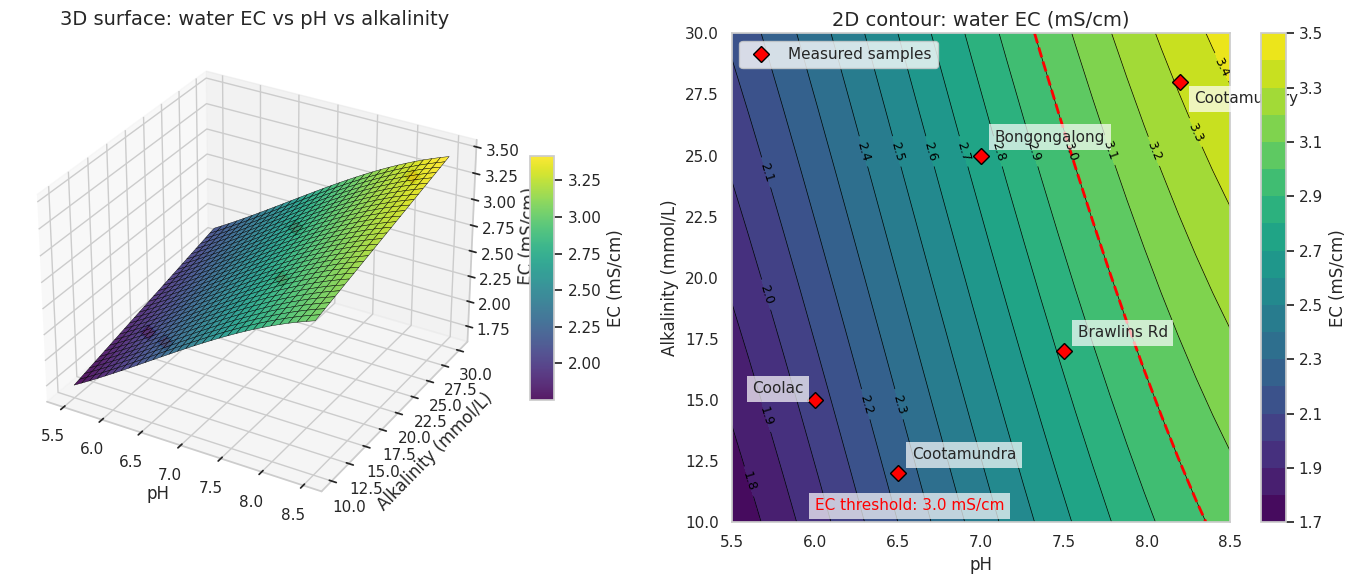

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# X: pH, Y: Alkalinity (mmol/L)
pH = np.linspace(5.5, 8.5, 30)
alkalinity = np.linspace(10, 30, 30)
X, Y = np.meshgrid(pH, alkalinity)

# EC surface (in mS/cm)
Z = 2.0 + 1.0 * np.sin((X-6.5)/2.0) + 0.02 * Y

# Sample points
sample_points = {
    'Coolac': (6.0, 15),
    'Cootamundra': (6.5, 12),
    'Brawlins Rd': (7.5, 17),
    'Bongongalong': (7.0, 25),
    'Cootamundry': (8.2, 28)
}

fig = plt.figure(figsize=(14, 6))

# 3D Surface Plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap=cm.viridis, 
                       edgecolor='k', linewidth=0.3, alpha=0.9)
ax1.set_xlabel('pH', fontsize=12, fontweight='normal')
ax1.set_ylabel('Alkalinity (mmol/L)', fontsize=12, fontweight='normal')
ax1.set_zlabel('EC (mS/cm)', fontsize=12, fontweight='normal')
ax1.set_title('3D surface: water EC vs pH vs alkalinity', fontsize=14)

# 2D Contour Plot
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, Z, cmap=cm.viridis, levels=20)
contour_lines = ax2.contour(X, Y, Z, colors='black', levels=20, linewidths=0.5)
ax2.clabel(contour_lines, inline=True, fontsize=9, fmt='%.1f')

# Plot measured samples and prevent overlapping labels
for label, (x, y) in sample_points.items():
    # Find EC at sample point
    xi = np.abs(pH - x).argmin()
    yi = np.abs(alkalinity - y).argmin()
    z = Z[yi, xi]
    
    # Plot on 3D surface
    ax1.scatter(x, y, z, color='red', marker='D', s=60, edgecolor='k')
    
    # Plot on 2D contour with custom offsets to prevent overlap
    ax2.plot(x, y, 'D', color='red', markersize=8, markeredgecolor='k')
    if label == "Cootamundry":
        offset_x, offset_y = 10, -15
    elif label == "Coolac":
        offset_x, offset_y = -45, 5
    else:
        offset_x, offset_y = 10, 10
        
    ax2.annotate(label, (x, y), 
                 xytext=(offset_x, offset_y), 
                 textcoords='offset points',
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'),
                 fontsize=11)

# EC threshold line
threshold = 3.0
contour_threshold = ax2.contour(X, Y, Z, levels=[threshold], 
                               colors='red', linestyles='dashed', linewidths=2)
ax2.text(6.0, 10.5, 'EC threshold: 3.0 mS/cm', 
         color='red', fontsize=11, rotation=0,
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Add legend without overlap
ax2.plot([], [], 'D', color='red', markersize=8, markeredgecolor='k', 
         label='Measured samples')
ax2.legend(loc='upper left', fontsize=11)

ax2.set_xlabel('pH', fontsize=12, fontweight='normal')
ax2.set_ylabel('Alkalinity (mmol/L)', fontsize=12, fontweight='normal')
ax2.set_title('2D contour: water EC (mS/cm)', fontsize=14)

# Add colorbars
cbar1 = fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10)
cbar1.set_label('EC (mS/cm)', fontsize=12, fontweight='normal')
cbar2 = fig.colorbar(contour, ax=ax2)
cbar2.set_label('EC (mS/cm)', fontsize=12, fontweight='normal')

plt.tight_layout()
plt.show()
